In [3]:
#from code.config import Config, DATA_DIR, RESULT
from config import DATA_DIR
import numpy as np
import pandas as pd
import copy
import os
import copy

data900 = pd.read_excel(os.path.join(DATA_DIR, "data9000.xlsx"), index_col=0).to_numpy()
data900 = data900[:, 13:15]
print(data900.shape)

(535, 2)


In [21]:
data900 = pd.read_excel(os.path.join(DATA_DIR, "data9000.xlsx"), index_col=0).to_numpy()
data900 = data900[:, 13:15]
data901 = pd.read_excel(os.path.join(DATA_DIR, "data9001.xlsx"), index_col=0).to_numpy()
data901 = data901[:, 13:15]
data902 = pd.read_excel(os.path.join(DATA_DIR , "data9002.xlsx"), index_col=0).to_numpy()
data902 = data902[:, 13:15]
data_bus = {"900":data900, "901":data901, "902":data902}

In [22]:
data900 = pd.read_excel(os.path.join(DATA_DIR, "data9000.xlsx"), index_col=0).to_numpy()
data900[0:19, 13]

array([0.20085879, 0.43907145, 0.62960615, 0.80404254, 0.41923321,
       0.26780549, 0.91219468, 0.80482653, 0.41942857, 0.15823606,
       0.51139979, 0.70950484, 0.6315275 , 0.30633547, 0.21332059,
       0.31177557, 0.45085854, 0.54945526, 0.36402421])

In [23]:
import numpy as np
import pandas as pd
import copy
import os

from  config import *

index_of_episode = 0
data = pd.read_csv(os.path.join(DATA_TASK, "datatask{}.csv".format(index_of_episode)),header=None).to_numpy()
data = np.sort(data, axis=0)
#self.data[:,2] = self.data[:,2] / 1000.0
#self.data[:,1] = self.data[:,1] / 1024.0
pd.DataFrame(data)




,0,1,2,3,4
0,0.0,500.0,1001.0,100.0,1.000818
1,0.0,501.0,1001.0,100.0,1.000941
2,0.0,501.0,1003.0,100.0,1.001598
3,0.0,504.0,1003.0,100.0,1.005719
4,0.0,506.0,1003.0,100.0,1.006680
...,...,...,...,...,...
990,298.0,1492.0,1996.0,199.0,2.987034
991,298.0,1492.0,1997.0,199.0,2.987292
992,298.0,1494.0,1999.0,199.0,2.987890
993,299.0,1498.0,1999.0,199.0,2.993199


In [24]:
queue = copy.deepcopy(data[data[:,0]==data[0][0]])
pd.DataFrame(queue)

,0,1,2,3,4
0,0.0,500.0,1001.0,100.0,1.000818
1,0.0,501.0,1001.0,100.0,1.000941
2,0.0,501.0,1003.0,100.0,1.001598
3,0.0,504.0,1003.0,100.0,1.005719
4,0.0,506.0,1003.0,100.0,1.006680
5,0.0,506.0,1004.0,100.0,1.012624
6,0.0,507.0,1004.0,100.0,1.013040


In [25]:
data = data[data[:,0]!=data[0][0]]
result = []
time_last = data[-1][0]
time = queue[0][0]
pd.DataFrame(data)

,0,1,2,3,4
0,1.0,511.0,1005.0,100.0,1.013803
1,1.0,512.0,1006.0,100.0,1.014637
2,1.0,512.0,1006.0,100.0,1.015067
3,2.0,513.0,1008.0,101.0,1.016884
4,2.0,514.0,1008.0,101.0,1.017428
...,...,...,...,...,...
983,298.0,1492.0,1996.0,199.0,2.987034
984,298.0,1492.0,1997.0,199.0,2.987292
985,298.0,1494.0,1999.0,199.0,2.987890
986,299.0,1498.0,1999.0,199.0,2.993199


In [26]:
time_last

299.0

In [27]:
def readexcel(number_bus, time):
    data = data_bus[str(number_bus)]

    after_time = data[data[:,1] >= time]
    pre_time = data[data[:,1]<=time]
    if len(after_time) == 0:
        return 1.8
    las = after_time[0]
    first = pre_time[-1]
    if las[1] != first[1]:
        distance = (las[0] * (las[1]-time) + first[0] * (-first[1]+time)) / (las[1]-first[1])
    else:
        distance = las[0] 
    return distance

In [28]:
observation = np.array([readexcel(900,queue[0][0]),
                        0.0,
                        1,
                        readexcel(901,queue[0][0]),
                        0,
                        1.2,
                        readexcel(902,queue[0][0]),
                        0,
                        1,
                        0,
                        3,
                        queue[0][1],
                        queue[0][2],
                        queue[0][4]])
observation.shape

(14,)

In [29]:
observation = np.array([readexcel(900,queue[0][0]),
                        max(0,observation[1]-(time-time_last)),
                        1,
                        readexcel(901,queue[0][0]),
                        max(0,observation[4]-(time-time_last)),
                        1.2,
                        readexcel(902,queue[0][0]),
                        max(0,observation[7]-(time-time_last)),
                        1,
                        max(0,observation[9]-(time-time_last)),
                        3,
                        queue[0][1],
                        queue[0][2],
                        queue[0][4]])

In [31]:
queue.shape

(7, 5)

In [22]:
data900 = pd.read_excel(os.path.join(DATA_DIR, "C51506.xlsx")).to_numpy()
data900 = data900[:500, 9:11]
temp = np.zeros(data900.shape)
temp[:, 1] = data900[:500, 1].min()
data900 -= temp
print(data900)

[[1.074922036604115 0.0]
 [1.369926775432738 90.0]
 [1.445936047608925 150.0]
 [1.709790610113252 210.0]
 [1.726191965492091 270.0]
 [1.669674790405796 330.0]
 [1.585383736111563 390.0]
 [1.138650875390691 450.0]
 [1.138650875390691 480.0]
 [1.075563703019421 540.0]
 [1.366915514359164 750.0]
 [2.041110710187589 870.0]
 [2.108462235667144 930.0]
 [2.028582638454675 990.0]
 [1.94171386548591 1050.0]
 [1.665533087804029 1140.0]
 [1.537435003224017 1200.0]
 [1.338066025302763 1290.0]
 [1.338066025302763 1350.0]
 [0.6764852922841075 1468.0]
 [0.2549215544711482 1528.0]
 [0.1423810549757891 1588.0]
 [0.5301492162263103 1708.0]
 [0.5782949456551822 1738.0]
 [0.7156993715231379 1798.0]
 [1.175307340128403 1948.0]
 [1.418631835035557 2008.0]
 [1.147329832242621 2128.0]
 [1.05194878147008 2158.0]
 [0.609740637558577 2248.0]
 [0.1983859811838376 2308.0]
 [0.1130393791049295 2338.0]
 [0.2274823579337617 2398.0]
 [0.4468408919271835 2458.0]
 [0.6398114530104365 2548.0]
 [0.6975550226556978 2608.0]

In [14]:
data900[:500, 1].min()

412.0

In [19]:
temp = np.zeros(data900.shape)
temp[:, 1] = data900[:500, 1].min()
temp

array([[  0., 412.],
       [  0., 412.],
       [  0., 412.],
       [  0., 412.],
       [  0., 412.],
       [  0., 412.],
       [  0., 412.],
       [  0., 412.],
       [  0., 412.],
       [  0., 412.],
       [  0., 412.],
       [  0., 412.],
       [  0., 412.],
       [  0., 412.],
       [  0., 412.],
       [  0., 412.],
       [  0., 412.],
       [  0., 412.],
       [  0., 412.],
       [  0., 412.],
       [  0., 412.],
       [  0., 412.],
       [  0., 412.],
       [  0., 412.],
       [  0., 412.],
       [  0., 412.],
       [  0., 412.],
       [  0., 412.],
       [  0., 412.],
       [  0., 412.],
       [  0., 412.],
       [  0., 412.],
       [  0., 412.],
       [  0., 412.],
       [  0., 412.],
       [  0., 412.],
       [  0., 412.],
       [  0., 412.],
       [  0., 412.],
       [  0., 412.],
       [  0., 412.],
       [  0., 412.],
       [  0., 412.],
       [  0., 412.],
       [  0., 412.],
       [  0., 412.],
       [  0., 412.],
       [  0.,

In [31]:
a = np.zeros(19)
a[-1] = 1
b = copy.deepcopy(a[18])
b = 6
a

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1.])

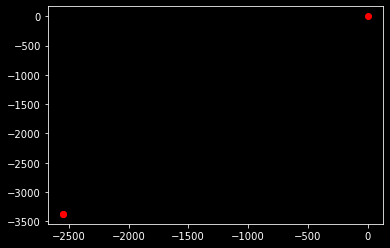

In [9]:
import matplotlib.pyplot as plt
plt.style.use('dark_background')
figure, axes = plt.subplots()
a1 = -2545.436118708
b1 = -3371.122638
a2 = -2545.838416548
b2 = -3371.330898
a3 = -2545.77184848
b3 = -3371.882202
a1 = a1 - a1
b1 = b1 - b1
a2 = a2 - a1
b2 = b2 - b1
a3 = a3 - a1
b3 = b3 - b1
c1 = 1.074922037
c2 = 1.369926775
c3 = 1.445936048
axes.plot(a1, b1, marker="o", color="red")
axes.plot(a2, b2, marker="o", color="red")
axes.plot(a3, b3, marker="o", color="red")
draw_circle1 = plt.Circle((a1, b1), c1,fill=False)
draw_circle2 = plt.Circle((a2, b2), c2,fill=False)
draw_circle3 = plt.Circle((a3, b3), c3,fill=False)
axes.add_artist(draw_circle1)
# axes.add_artist(draw_circle2)
# axes.add_artist(draw_circle3)
plt.show()

In [26]:
pwd

'D:\\Projects\\Python\\Lab\\MEC_VER_NEW_VEHICLES\\Mec_ver4-main\\code'

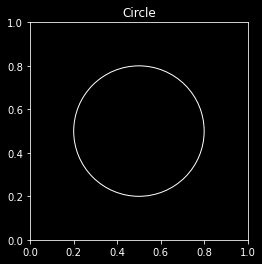

In [19]:
import matplotlib.pyplot as plt

figure, axes = plt.subplots()
draw_circle = plt.Circle((0.5, 0.5), 0.3,fill=False)

axes.set_aspect(1)
axes.add_artist(draw_circle)
plt.title('Circle')
plt.show()

In [7]:
data900 = pd.read_excel('../data/C51506.xlsx').values[:500, 7:9]
data900

array([[-2545.436118708, -3371.122638],
       [-2545.838416548, -3371.330898],
       [-2545.77184848, -3371.882202000001],
       [-2545.898427828, -3372.245838],
       [-2545.629710652, -3372.631782],
       [-2545.422782868, -3372.7395],
       [-2545.172847, -3372.80346],
       [-2544.790441788, -3372.48834],
       [-2544.790441788, -3372.48834],
       [-2544.627300012, -3372.46962],
       [-2544.022519668, -3372.730842],
       [-2543.79592152, -3373.366698],
       [-2543.323721652, -3373.665438],
       [-2543.20692192, -3373.73712],
       [-2543.058116172, -3373.822842],
       [-2542.786731828, -3374.131098],
       [-2542.590028188, -3374.319156],
       [-2542.493343348, -3374.57952],
       [-2542.493343348, -3374.57952],
       [-2542.80351276, -3375.163896],
       [-2542.9946598, -3375.5397],
       [-2543.168136852, -3375.631038],
       [-2543.536872828, -3376.086558],
       [-2543.53031604, -3376.167522],
       [-2543.479306452, -3376.38054],
       [-2542.85

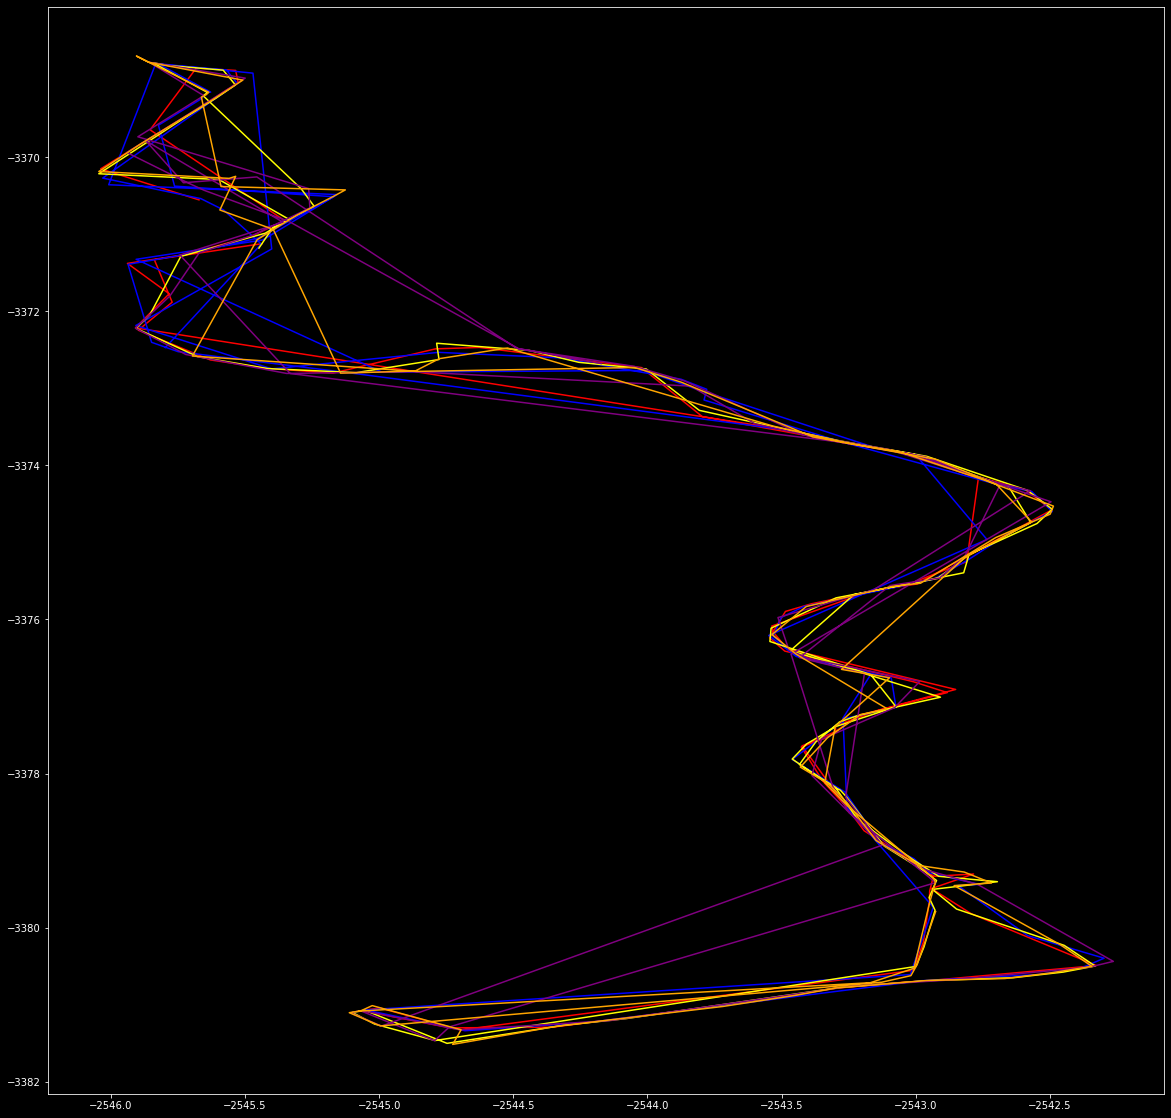

In [31]:
plt.rcParams['figure.figsize'] = [20, 20]
a = 0
b = 100
data1 = pd.read_excel('../data/xe1.xlsx').values[a:b, 7:9]
plt.plot(data1[:, 0], data1[:, 1], color="red")
data2 = pd.read_excel('../data/xe2.xlsx').values[a:b, 7:9]
plt.plot(data2[:, 0], data2[:, 1], color="blue")
data3 = pd.read_excel('../data/xe3.xlsx').values[a:b, 7:9]
plt.plot(data3[:, 0], data3[:, 1], color="yellow")
data4 = pd.read_excel('../data/xe4.xlsx').values[a:b, 7:9]
plt.plot(data4[:, 0], data4[:, 1], color="purple")
data5 = pd.read_excel('../data/xe5.xlsx').values[a:b, 7:9]
plt.plot(data5[:, 0], data5[:, 1], color="orange")

In [24]:
np.mean(data900[:, 0]), np.mean(data900[:, 1])

(-2545.3378335671996, -3372.2202617999997)

In [37]:
from config import *
distance_req = 5
Rate_trans_req_data = (200 * np.log2(
                        1 + Pr / np.power(distance_req,PATH_LOSS_EXPONENT) / SIGMASquare
                    )
                ) / 8
energy = P * 0.195/(Rate_trans_req_data)
energy

292.54602290969103

In [43]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

ModuleNotFoundError: No module named 'tensorflow'

In [41]:
!pip3 show tensorflow

Name: tensorflow
Version: 2.3.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: c:\users\mrbinh\.conda\envs\billie\lib\site-packages
Requires: numpy, scipy, tensorflow-estimator, grpcio, astunparse, tensorboard, wheel, wrapt, h5py, opt-einsum, protobuf, google-pasta, gast, termcolor, six, keras-preprocessing, absl-py
Required-by: keras-rl2


'export' is not recognized as an internal or external command,
operable program or batch file.
